# Homework 7

Unlike previous homework assignments, this homework is **completed as a group** and **submitted on CCLE.** In other words, it's similar to an extended Discussion Activity. 

## Problem 0

It is highly recommended that you work with your group to fully complete the previous Discussion assignments related to the project this week, as all of these are directly helpful for your project submission. 

## Problem 1

In your project, you are required to demonstrate the use of decision trees and multinomial logistic regression classifiers. Groups of three must also demonstrate the use of one additional model. In this homework assignment, you will write a detailed report that will largely fulfill this requirement. 

Choose one machine learning model, other than decision trees and multinomial logistic regression (unless you are a group of 2 -- see below). Some possibilities include, but are not limited to: 

- Support vector classifiers (`sklearn.svm.SVC`). Complexity parameter is called `gamma`. Higher values create more complex models)
- K-nearest-neighbor classifiers (`sklearn.neighbors.KNeighborsClassifier`). Complexity parameter is called `n_neighbors`. Higher values create less complex models. When working with KNN models, it is helpful to standardize your data columns first. For this purpose, `sklearn.preprocessing.StandardScaler` can be used. 
- Multilayer perceptron classifier, a kind of neural network (`sklearn.neural_network.MLPClassifier`). The complexity is controlled by the number of neurons and layers, as specified by the `hidden_layer_sizes` parameter -- more neurons and layers correspond to more complex models. 

You should consult the documentation for these models, which is available online or via `?`. 


#### Groups of 2

If you are a group of 2, you are not required to use an additional model and may instead use multinomial logistic regression for this assignment. Please note this in your submission. 

- Multinomial logistic regression (`sklearn.linear_model.LogisticRegression`). The complexity is controlled by `C`, the inverse regularization strength. Larger values of `C` correspond to more complex models. 

### Instructions

Replicate and expand the pipeline from Discussion 15, substituting out decision trees for your chosen classifier. In particular, you should: 

1. **Load** the data. 
2. **Split the data** into training and test sets. 
3. Write one or more functions to **clean and transform the data** as needed. You should add comments and function docstrings as appropriate to describe to your reader what you are doing and why. Apply your functions to the training and test sets. 
4. **Select 3 columns (features)** from the data. You are required to use at least one qualitative feature (like Island or Sex). We saw one way of doing this "by hand" during a previous Live Lecture, but there are many other approaches as well. You may wish to delegate one group member to do some research on the topic of "feature selection in Python with sklearn". 
4. **Use cross-validation** to estimate optimal model complexity (*Note*: cross-validation is also an acceptable way to perform feature selection -- you may use it above, but you are required to use it here). 
5. Having selected your features and an optimal complexity, **evaluate your model on the test set.** 
6. **Inspect** a few instances in which your trained model gave the wrong answer on the test set. Explain why your model was "tricked" in this case? Create and comment on a confusion matrix -- [check Monday's lecture notes](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/content/ML/digits.ipynb) for an example. 
7. **Plot the decision regions** for your model. These are covered in a recent live lecture, and code required to construct them is below. The horizontal and vertical axes should be the two quantitative predictor variables that you selected. Create a separate plot for each possible value of the qualitative predictor variable that you selected. For example, if you chose `Sex` as your qualitative variable, you should show two plots, with the decision regions for Female and Male penguins separately. Add appropriate axis labels and any other measures required to make your plots look professional. Add commentary to contextualize the mistakes that your model made. 
    - You are welcome to use the [code from live lecture](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/live_lectures/live-lecture-22.ipynb) for this purpose. A common pitfall when using code for manual decision regions is re-training a model (using `model.fit()`) once for each plot. You should ensure that your model is only trained once, and that its predictions are then extracted for each plot. 
    - Another good approach is to use a built-in function for decision regions, like from the package `mlxtend` ([link](https://rasbt.github.io/mlxtend/installation/)). You can install this package by running the code `conda install mlxtend` in a Python code cell. (*Note*: this isn't really the recommended way to install packages in Anaconda, but because we haven't covered environment management it's ok to do here). 

Throughout, add helpful explanation for your reader. For example, you should explain the idea behind cross-validation; anything you are able to learn about how your model works; how to interpret the optimal complexity parameter; and why your model went wrong in certain cases.  

### Additional Specifications

This homework will be graded by me personally, and will be graded using a rubric very similar to that used for the final project. I'll also give you some feedback indicating how you can improve. To get the most benefit out of this feedback, you should **treat this homework as a rehearsal for the full project.** 

Your solution should **not** fit in a single code cell -- a good, readable, and adequately-explained solution will likely require at least one code cell for each of the eight steps above. Make sure that there is plenty of surrounding text explanation and comments. Add code cells and plenty of markdown cells as needed. You can also use section headers with `###` to organize your work. 

Your comments and explanation should be written to an imaginary reader who has never encountered the Palmer Penguins data set before, and knows less about machine learning than you do. Explain your steps. Why train-test split? Why cross-validation? Why decision regions? And so on. If you'd like, imagine that you are writing to a time-traveller version of you from two weeks ago. 

It is not necessary to submit the HW on a copy of this notebook -- you may create and submit a fresh notebook if you wold like. Regardless, 

#### You are required to include a Group Contributions Statement on this HW. 

## Your Solution

### Group Contribution Statement

### Importing Modules and Data
The dataset we are using is palmer penguins. This dataset includes several measurements taken for 344 penguins in Antarctica. 

In [1]:
# importing modules
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
import numpy as np

In [2]:
# loading the data
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

In [3]:
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In a previous discussion section, we noticed that the `Sex` of penguin 336 was encoded as `.` At this point in the HW, we did not know which columns we were going to use, so we removed penguin 336 from the dataset. 

In [4]:
# dropping the row in which the penguin's sex is '.'
penguins = penguins.drop(336)

In [5]:
# making sure that this penguin is no longer in the dataset
penguins[penguins['Sex'] == '.'] 

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments


### Preprocessing
In this portion of the HW, we will be preprocessing the `penguins` dataset. The first thing to do is to split the dataset into a training and testing split. This allows us to *train* the model on one subset of the data, and later *test* how good the model is at classifying by comparing its predictions to some *unseen* data. 

In [6]:
from sklearn.model_selection import train_test_split

np.random.seed(1000)

train, test = train_test_split(penguins, test_size = 0.2)

After this, we have lots of preprocessing to do. Most importantly, we need to separate the **predictor variables** (characteristics of the penguins) from the **target variables** (Species of the penguin). Since we need to do this for the training and the testing split, we can write a function to do so. Since we are preprocessing, we might as well remove some irrelevant columns that won't matter to our model, like `studyName`, `Comments`, etc. We can also remove the rows in which there are `NaN` values for the predictor variables we may use. In addition to this, we need to convert some text information to numerical data so that our model can understand it. Attributes like `Sex`, `Region`, etc can only have a few different values, so using a `LabelEncoder` can help us convert this to a numerical value

In [7]:
def clean_data(df_data):
    """
    A function to clean the DataFrame and split the train and test splits further into predictor and target variables
    
    Parameters
    ----------
    df_data: The df to be cleaned
    
    Returns
    -------
    X: the cleaned predictor variables
    y: the cleaned target variable
    """
    df = df_data.copy()
    df = df.drop(['studyName', 'Sample Number', 'Stage', 'Individual ID', 'Comments', 'Date Egg', 'Clutch Completion'], axis = 1)
    df = df.dropna() # dropping NaN rows for columns of interest
    le = preprocessing.LabelEncoder()
    for col in ['Sex', 'Species', 'Island', 'Region']:
        df[col] = le.fit_transform(df[col])

    X = df.drop(['Species'], axis = 1) # now, X only has predictor variables 
    y = df['Species'] # y is a column of species
    
    return X, y

In [8]:
X_train, y_train = clean_data(train)
X_test, y_test = clean_data(test)

In [9]:
# checking to make sure our cleaning worked properly
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(255, 9) (255,)
(69, 9) (69,)


### Feature Selection
In order to choose which 3 columns may give us the most accurate model, we decided to test all the possible combinations that could be made from the 9 possible predictor variables. In order to do so, we used `itertools.combinations` and `cross_val_score` to see which combinations gave us the highest accuracy. In order to make sure we had at least 1 qualitative column in our feature set, we used the `any()` method to see if any of the elements in the possible combinations were one of the qualitative values. If there were none, we discarded the combination. 

In [10]:
feature_array = np.array(X_train.columns) # making an array of the column names in X_train

In [11]:
import itertools
combos = itertools.combinations(feature_array, 3) # creating an array of combinations of length 3

In [12]:
qualitative_columns = ['Sex', 'Island', 'Region'] # list of the qualitative columns -- we need one of these
combosof3 = []
for i in combos:
    i = list(i) # converting the combination to a list
    if any(item in i for item in qualitative_columns): # if there is a qualitative value present, we will consider this combination
        combosof3.append(i)

Now, we need to actually see which combination is the best in terms of accurately predicting the species of the penguin. For this, we used `cross_val_score`. K-fold cross validation takes a small piece of the training data (say 10%) and hides it from the model, akin to a mini test set. We train the model on the remaining 90% and then evaluate its performance based on the 10% that we hid. We can then hide a *different* 10% of the data and do the same thing. We can repeat this many times to eventually get an average picture of how our model may perform on the real test data. This is very useful when evaluating optimal complexity of a model, but can also be used for feature selection. To do this, we initialized a `best_score` and `best_combo` value and list to `0` and `empty` respectively. We then looped through all the viable combinations we generated from the previous code cell and trained an `SVM` model with these columns using cross validation. We then checked to see if the `cv_score` was better than the `best_score`. If it was, update the current `best_score` with the new `cv_score`, and update the `best_combo` list with the current combination. 

In [13]:
from sklearn import svm
from sklearn.model_selection import cross_val_score 

def check_column_score(combosof3):
    """
    Trains and evaluates a model via cross-validation on the different combinations of columns of the data
    
    Parameters
    ----------
    combosof3: A list of potential combinations that can be used to train a model
    
    Returns
    -------
    best_combo: the best combination of columns in terms of accuracy
    best_score: the highest score acheived by a model with the best combination
    """
    # print("training with columns " + str(cols)
    best_score = 0
    best_combo = []
  
    for cols in combosof3:
        SVM = svm.SVC()
        cv_score = cross_val_score(SVM, X_train[cols], y_train, cv = 5).mean()
        if cv_score > best_score:
            best_score = cv_score
            best_combo = cols
    
    return best_combo, best_score

In [14]:
best_combo, best_score = check_column_score(combosof3)

In [15]:
print(best_combo, best_score) # we found the best combination had an accuracy of 84%

['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'] 0.8509803921568627


In [16]:
# updating X_train and X_test to only have the 'best' columns
X_train = X_train[best_combo]
X_test = X_test[best_combo]

### Choosing Optimal Model Complexity
Now that we have the best columns, we need to see what the best model complexity is. The complexity parameter for SVM is called `gamma`. In essence, a higher `gamma` value will create a more complex model. While this may sound good, it could lead to *overfitting*. This is a phenomenon that occurs when our model complexity is so high that it perfectly (or almost perfectly) classifies the training data (that it has seen), but performs far far worse on the test data (that it has not seen). In order to choose the optimal model complexity, we will again use K-fold cross validation. Here however, instead of modifying the columns, we will modify the `gamma` value. In order to show this information clearly, we can plot the decrease in CV score due to the increasing model complexity. 

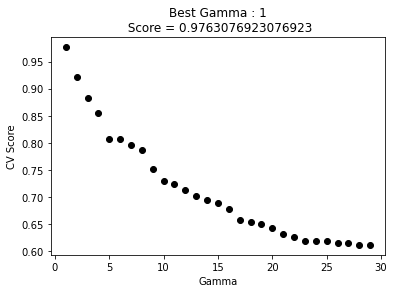

In [17]:
fig, ax = plt.subplots(1)

best_score = 0
best_gamma = 0

for d in range(1, 30): # try gamma values from 1 to 30
    SVM = svm.SVC(gamma = d)
    cv_score = cross_val_score(SVM, X_train, y_train, cv = 10).mean()
    ax.scatter(d, cv_score, color = 'black') # plot the gamma value and the cv_score

    if cv_score > best_score:
        best_gamma = d
        best_score = cv_score

l = ax.set(title = "Best Gamma : " + str(best_gamma) + "\n Score = " + str(best_score),
           xlabel = "Gamma",
           ylabel = "CV Score",
           alpha = 0.5)

From this graph, we can clearly see that the CV score decreases consistently as we increase the `gamma` value. We can clearly see that the best value for `gamma` is actually 1 (accuracy of 0.976). However, lets investigate further and see if there is another `gamma` value that may yield a higher score

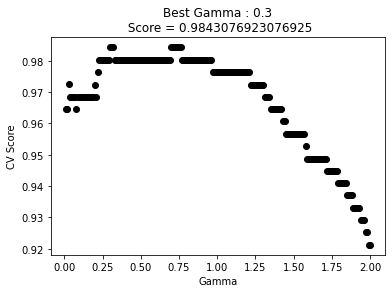

In [18]:
fig, ax = plt.subplots(1)

best_score = 0
best_gamma = 0

for d in np.linspace(0.01, 2, 200): # this time, we are checking 200 possible values between 0.01 and 2.0
    SVM = svm.SVC(gamma = d)
    cv_score = cross_val_score(SVM, X_train, y_train, cv = 10).mean()
    ax.scatter(d, cv_score, color = 'black')

    if cv_score > best_score:
        best_gamma = d
        best_score = cv_score

l = ax.set(title = "Best Gamma : " + str(best_gamma) + "\n Score = " + str(best_score),
           xlabel = "Gamma",
           ylabel = "CV Score",
           alpha = 0.5)

This time, we looked at potential `gamma` values between `0.01` and `2.0` and found that we could get an even higher score of `0.984` when we used `gamma = 0.3`. Now that we have the optimal model complexity, lets see how it performs on the actual test data. 

In [48]:
print('Best Gamma = ' + str(best_gamma))
SVM = svm.SVC(gamma = best_gamma) # Creating an SVM model with gamma = best_gamma
SVM.fit(X_train, y_train) # fitting the model on all of our training data
print('Score = ' + str(SVM.score(X_test, y_test))) # evaluating the model on the test data

Best Gamma = 0.3
Score = 0.9565217391304348


Not bad! We got an accuracy of around 95% when we fitted the model on all of the training data and evaluated it with the testing data. However, there are still many things we can do!

### Confusion Matrix
Although our model is pretty good, it still messes up on occasion. Lets try to figure out why this is happening. In order to do this, we can create a *confusion matrix*, which basically shows us where our model is incorrectly classifying penguins. 
**Note:** need to double check this -- reread the q

In [20]:
# get the model's predictions based on the test data
y_test_pred = SVM.predict(X_test)
y_test_pred

array([2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2,
       2, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2,
       2, 1, 2])

In [21]:
# create a confusion matrix of the actual test target variables and our model's predictions
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_test_pred)
c

array([[26,  1,  0],
       [ 1, 14,  0],
       [ 0,  1, 26]])

In a confusion matrix, the `i,j`th entry shows us the number of times the model predicted `j` when the value was actually `i`. For example, the very first number in the matrix is `26`. This means that the model predicted the species to be `0` (remember we used a `LabelEncoder` to change names to numbers) and the actual species was also `0` 26 times. Similarly, the model predicted the species to be `0` when the actual species was `1` on `1` occasion. We can use Boolean indexing to extract all the incorrectly classified penguins.

In [22]:
mistakes = X_test[y_test != y_test_pred] # getting the rows of X_test for which our model messed up
mistake_labels = y_test[y_test != y_test_pred] # getting the actual species for where the model messed up 
mistake_preds = y_test_pred[y_test != y_test_pred] # getting the (incorrect) predicted species

mistake_preds, mistake_labels

(array([1, 1, 0]),
 253    2
 73     0
 216    1
 Name: Species, dtype: int64)

So, we can see that we messed up with Penguins 253, 73, and 216.
- Our model thought 253 was a Chinstrap Penguin: It was actually a Gentoo Penguin
- Our model thought 73 was a Chinstrap Penguin: It was actually an Adelie Penguin
- Our model thought 216 was an Adelie Penguin: It was actually a Chinstrap Penguin

Lets get the information for these penguins and see if we can figure out why the model classified them incorrectly

In [23]:
penguins[['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']].groupby(['Species', 'Island']).aggregate([np.mean, np.std])

Culmen Length (mm)  \
                                                                  mean   
Species                                   Island                         
Adelie Penguin (Pygoscelis adeliae)       Biscoe             38.975000   
                                          Dream              38.501786   
                                          Torgersen          38.950980   
Chinstrap penguin (Pygoscelis antarctica) Dream              48.833824   
Gentoo penguin (Pygoscelis papua)         Biscoe             47.529508   

                                                               \
                                                          std   
Species                                   Island                
Adelie Penguin (Pygoscelis adeliae)       Biscoe     2.480916   
                                          Dream      2.465359   
                                          Torgersen  3.025318   
Chinstrap penguin (Pygoscelis antarctica) Dream      3.339256   
Gentoo penguin (Pygoscelis papua)         Biscoe     3.082386   

                                                    Culmen Depth (mm)  \
                                                                 mean   
Species                                   Island                        
Adelie Penguin (Pygoscelis adeliae)       Biscoe            18.370455   
                                          Dream             18.251786   
                                          Torgersen         18.429412   
Chinstrap penguin (Pygoscelis antarctica) Dream             18.420588   
Gentoo penguin (Pygoscelis papua)         Biscoe            14.976230   

                                                               
                                                          std  
Species                                   Island               
Adelie Penguin (Pygoscelis adeliae)       Biscoe     1.188820  
                                          Dream      1.133617  
                                          Torgersen  1.339447  
Chinstrap penguin (Pygoscelis antarctica) Dream      1.135395  
Gentoo penguin (Pygoscelis papua)         Biscoe     0.983084

In [24]:
penguins[['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']].loc[253]

Species               Gentoo penguin (Pygoscelis papua)
Island                                           Biscoe
Culmen Length (mm)                                 59.6
Culmen Depth (mm)                                    17
Name: 253, dtype: object

We can see that Penguin 253 has a rather long Culmen Length (59.6) which is closer to the average Culmen Length for Chinstrap penguins. Furthermore, Penguin 253's Culmen Depth is far closer to the average Culmen Depth of Chinstrap penguins than Gentoo penguins. Due to this, it was incorrectly classified as a Chinstrap penguin when it was actually a Gentoo penguin

In [25]:
penguins[['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']].loc[73]

Species               Adelie Penguin (Pygoscelis adeliae)
Island                                          Torgersen
Culmen Length (mm)                                   45.8
Culmen Depth (mm)                                    18.9
Name: 73, dtype: object

Penguin 73's Culmen Length is also much closer to the average Culmen Length of Chinstrap penguins than they are the to the averages for Adelie penguins, so the model incorrectly classfied them.

In [26]:
penguins[['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']].loc[216]

Species               Chinstrap penguin (Pygoscelis antarctica)
Island                                                    Dream
Culmen Length (mm)                                         43.5
Culmen Depth (mm)                                          18.1
Name: 216, dtype: object

Penguin 216's Culmen Length and Depth are closer to the average Culmen Length and Depth of Adelie Penguins on Dream Island so the model incorrectly classifed it

### Decision Regions

In [27]:
penguins['Species']

0      Adelie Penguin (Pygoscelis adeliae)
1      Adelie Penguin (Pygoscelis adeliae)
2      Adelie Penguin (Pygoscelis adeliae)
3      Adelie Penguin (Pygoscelis adeliae)
4      Adelie Penguin (Pygoscelis adeliae)
                      ...                 
339      Gentoo penguin (Pygoscelis papua)
340      Gentoo penguin (Pygoscelis papua)
341      Gentoo penguin (Pygoscelis papua)
342      Gentoo penguin (Pygoscelis papua)
343      Gentoo penguin (Pygoscelis papua)
Name: Species, Length: 343, dtype: object

In [28]:
# give these a name for convenience
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
penguins['label'] = le.fit_transform(penguins['Species'])

penguins = penguins.dropna(subset=['Culmen Length (mm)', 'Culmen Depth (mm)'])

X = penguins[['Culmen Length (mm)', 'Culmen Depth (mm)']]
y = penguins['label']
x0 = X['Culmen Length (mm)']
x1 = X['Culmen Depth (mm)']

# create the grid
grid_x = np.linspace(x0.min(),x0.max(),501)
grid_y = np.linspace(x1.min(),x1.max(),501)
xx, yy = np.meshgrid(grid_x, grid_y)
xx.shape, yy.shape

((501, 501), (501, 501))

In [29]:
XX = xx.ravel()
XX

array([32.1  , 32.155, 32.21 , ..., 59.49 , 59.545, 59.6  ])

In [30]:
XX = xx.ravel()
YY = yy.ravel()
XY = np.c_[XX, YY]
XY.shape

(251001, 2)

In [53]:
DR_df = pd.DataFrame(XY, columns = ['Culmen Length (mm)', 'Culmen Depth (mm)'])
np.random.seed(42)
DR_df['Island'] = np.random.randint(0,3, size=len(DR_df))
DR_df = DR_df.reindex(columns = ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'])
DR_df

,Island,Culmen Length (mm),Culmen Depth (mm)
0,2,32.100,13.1
1,0,32.155,13.1
2,2,32.210,13.1
3,2,32.265,13.1
4,0,32.320,13.1
...,...,...,...
250996,0,59.380,21.5
250997,1,59.435,21.5
250998,0,59.490,21.5
250999,1,59.545,21.5


In [82]:
p = SVM.predict(DR_df)
torg = p[DR_df['Island'] == 0]


array([0, 1, 2])

In [83]:
p = p.reshape(xx.shape)
torg = torg.reshape(xx.shape)

ValueError: cannot reshape array of size 83817 into shape (501,501)

Current thought process -- somehow reshape the preds to filter them by island and then plot them one at a time

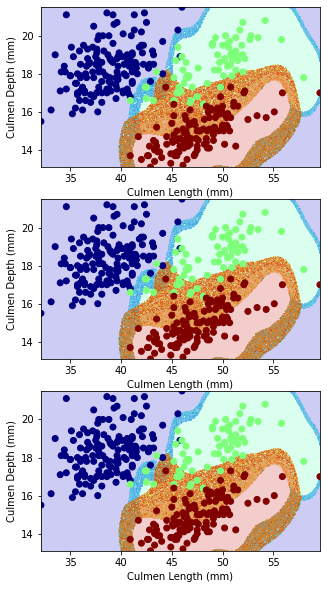

In [75]:
# create the plot
fig, ax = plt.subplots(3, figsize = (5, 10))
for i in range(3):
    
    # use contour plot to visualize the predictions
    ax[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2)

    # plot the data
    ax[i].scatter(x0, x1, c = y, cmap = "jet")

    ax[i].set(xlabel = "Culmen Length (mm)", 
              ylabel = "Culmen Depth (mm)")

In [29]:
def plot_regions(c, X, y):
        
    # for convenience, give names to the two 
    # columns of the data
    x0 = X['Culmen Length (mm)']
    x1 = X['Culmen Depth (mm)']
    
    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    # extract model predictions, using the 
    # np.c_ attribute to join together the 
    # two parts of the grid. 
    # array.ravel() converts an multidimensional
    # array into a 1d array, and we use array.reshape()
    # to turn the resulting predictions p 
    # back into 2d
    
    XX = xx.ravel()
    YY = yy.ravel()
    XY = np.c_[XX, YY]
    
    p = c.predict(XY)
    p = p.reshape(xx.shape)
    
    # create the plot
    fig, ax = plt.subplots(1)
    
    # use contour plot to visualize the predictions
    ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2)
    
    # plot the data
    ax.scatter(x0, x1, c = y, cmap = "jet")
    
    ax.set(xlabel = "Culmen Length (mm)", 
           ylabel = "Culmen Depth (mm)")

In [33]:
from mlxtend.plotting import plot_decision_regions

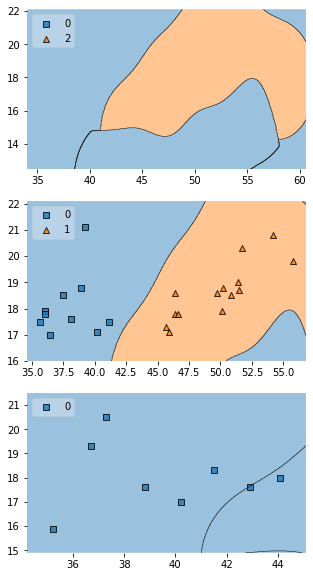

In [67]:
value = 1.5
width = 0.75

fig, ax = plt.subplots(3, figsize = (5, 10))

for island in X_test['Island'].unique():
    # index = (X_test['Island'] == island)
    X = X_test[X_test['Island'] == island]
    y = y_test[X_test['Island'] == island]
    plot_decision_regions(np.array(X), np.array(y), clf = SVM, feature_index = [1,2], filler_feature_values = {0: value}, filler_feature_ranges = {0: width}, legend = 2, ax = ax[island])

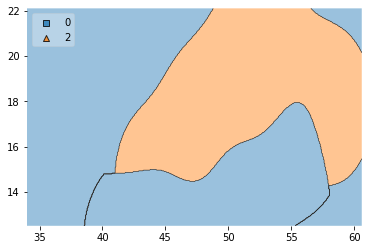

In [79]:
value = 1.5
width = 0.75

fig, ax = plt.subplots(1)

# index = (X_test['Island'] == island)
X = X_test[X_test['Island'] == 0]
y = y_test[X_test['Island'] == 0]
plot_decision_regions(np.array(X), np.array(y), clf = SVM, feature_index = [1,2], filler_feature_values = {0: value}, filler_feature_ranges = {0: width}, legend = 2, ax = ax)

In [80]:
X_test[X_test['Island'] == 0]

,Island,Culmen Length (mm),Culmen Depth (mm)
330,0,50.5,15.2
52,0,35.0,17.9
255,0,48.4,16.3
234,0,45.8,14.6
343,0,49.9,16.1
271,0,48.5,14.1
283,0,54.3,15.7
55,0,41.4,18.6
318,0,48.4,14.4
236,0,42.0,13.5


In [85]:
y_test[X_test['Island'] == 0]

330    2
52     0
255    2
234    2
343    2
271    2
283    2
55     0
318    2
236    2
288    2
254    2
21     0
247    2
265    2
258    2
304    2
323    2
235    2
111    0
61     0
245    2
267    2
327    2
260    2
29     0
311    2
253    2
334    2
238    2
229    2
113    0
103    0
Name: Species, dtype: int64

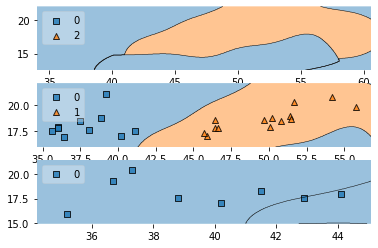

In [72]:
fig, ax = plt.subplots(3)

for island in X_test['Island'].unique():
    # index = (X_test['Island'] == island)
    X = X_test[X_test['Island'] == island]
    y = y_test[X_test['Island'] == island]
    plot_decision_regions(np.array(X), np.array(y), clf = SVM, feature_index = [1,2], filler_feature_values = {0: value}, filler_feature_ranges = {0: width}, legend = 2, ax = ax[island])

In [57]:
X_test[index, :]

TypeError: '(34     False
330    False
81     False
52     False
255    False
       ...  
229    False
113    False
122    False
127    False
103    False
Name: Island, Length: 65, dtype: bool, slice(None, None, None))' is an invalid key

In [73]:
y_test.unique()

array([0, 2, 1])

In [74]:
y_test[y_test == 2]

330    2
255    2
234    2
343    2
271    2
283    2
318    2
236    2
288    2
254    2
247    2
265    2
258    2
304    2
323    2
235    2
245    2
267    2
327    2
260    2
311    2
253    2
334    2
238    2
229    2
Name: Species, dtype: int64

In [75]:
def plot_regions(c, X, y, island):
        
    # for convenience, give names to the two 
    # columns of the data
    x0 = X['Culmen Length (mm)']
    x1 = X['Culmen Depth (mm)']
    
    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    # extract model predictions, using the 
    # np.c_ attribute to join together the 
    # two parts of the grid. 
    # array.ravel() converts an multidimensional
    # array into a 1d array, and we use array.reshape()
    # to turn the resulting predictions p 
    # back into 2d
    
    XX = xx.ravel()
    YY = yy.ravel()
    XY = np.c_[XX, YY]
    
    p = c.predict(XY)
    p = p.reshape(xx.shape)
    
    # create the plot
    fig, ax = plt.subplots(1)
    
    # use contour plot to visualize the predictions
    ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2)
    
    # plot the data
    ax.scatter(x0, x1, c = y, cmap = "jet")
    
    ax.set(xlabel = "Culmen Length (mm)", 
           ylabel = "Culmen Depth (mm)")

In [76]:
plot_regions(SVM, X_test, y_test, 'Dream')

TypeError: predict() takes 2 positional arguments but 3 were given